In [2]:
from pydriller import Repository
import csv
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


In [8]:
#Commit Data Code Sample
def save_commit_info_to_csv(repo_path, csv_file_path):
    # Create a Repository object
    repo = Repository(repo_path)

    # Open the CSV file in write mode
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        # Create a CSV writer
        csv_writer = csv.writer(csv_file)

        # Write header row
        csv_writer.writerow(['Commit Hash', 'Author', 'Committer', 'Commit Date'])

        # Iterate over all commits in the repository
        for commit in repo.traverse_commits():
            # Access commit attributes
            commit_hash = commit.hash
            commit_author = commit.author.name
            committer_name = commit.committer.name
            committer_date = commit.committer_date

            # Write data to the CSV file
            csv_writer.writerow([commit_hash, commit_author, committer_name, committer_date])

# Example usage:
repository_path = "G:\\University_Of_Windsor_Assignments\\Topics In Software Engineering\\Project\\hadoop"
csv_file_path = "G:\\University_Of_Windsor_Assignments\\Topics In Software Engineering\\Project\\Output\\commit_data_v1.csv"
save_commit_info_to_csv(repository_path, csv_file_path)

print(f"Commit data has been saved to {csv_file_path}")

Commit data has been saved to G:\University_Of_Windsor_Assignments\Topics In Software Engineering\Project\Output\commit_data_v1.csv


In [24]:


    def save_commit_info_to_csv(repo_path, csv_file_path):
        # Create a Repository object
        repo = Repository(repo_path)

        # Open the CSV file in write mode
        with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
            # Create a CSV writer
            csv_writer = csv.writer(csv_file)

            # Write header row
            csv_writer.writerow(['Commit Hash', 'Author', 'Committer', 'Commit Date','Commit modified_files','msg','Modified File', 'Change Type', 'Complexity','diff','diff_parsed','added_lines','deleted_lines'])

            # Iterate over all commits in the repository
            for commit in repo.traverse_commits():
                # Access commit attributes
                commit_hash = commit.hash
                commit_author = commit.author.name
                committer_name = commit.committer.name
                committer_date = commit.committer_date
                modified_files=commit.modified_files  
                msg = commit.msg 
        
                
            for modified_file in commit.modified_files:
                filename = modified_file.filename
                change_type = modified_file.change_type.name
                complexity = modified_file.complexity
                diff=modified_file.diff
                diff_parsed=modified_file.diff_parsed
                added_lines=modified_file.added_lines
                deleted_lines=modified_file.deleted_lines

                # Write data to the CSV file
                csv_writer.writerow([commit_hash, commit_author, committer_name, committer_date,modified_files,msg, filename, change_type, complexity,diff,diff_parsed,added_lines,deleted_lines])

    # Paths:
    repository_path = "G:\\University_Of_Windsor_Assignments\\Topics In Software Engineering\\Project\\hadoop"
    csv_file_path = "G:\\University_Of_Windsor_Assignments\\Topics In Software Engineering\\Project\\Output\\Output_Commit_Revert_Diff_Data_V1.csv"
    save_commit_info_to_csv(repository_path, csv_file_path)

    print(f"Commit data has been saved to {csv_file_path}")

Commit data has been saved to G:\University_Of_Windsor_Assignments\Topics In Software Engineering\Project\Output\Output_Commit_Revert_Diff_Data_V1.csv


In [27]:
def check_revert_in_source_code(repo_path):
    # Iterate over all commits in the repository
    for commit in Repository(repo_path).traverse_commits():
        for modified_file in commit.modified_files:
            # Access modified file attributes
            source_code = modified_file.source_code

        for commit in Repository(repo_path).traverse_commits():
            # Access commit attributes 
            msg = commit.msg 
            # Check if "Revert" is present in the source code
            if 'revert' in source_code:
                print(f'Revert found in the source code of file {modified_file.filename} in commit {commit.hash}')
            elif 'revert' in msg:
                print(f'Revert found in the source code of file {modified_file.filename} in commit {commit.hash}')

check_revert_in_source_code(repository_path)

Revert found in the source code of file overview.html in commit 34d67b1cc23acd1a3b658689bcfd902823381f27
Revert found in the source code of file overview.html in commit 05aeb2d9fd9c456d98fc61249c72ea19234ff2d5
Revert found in the source code of file overview.html in commit d34fee4aa3d04dbba5f0c7d361946c9e4405a932
Revert found in the source code of file overview.html in commit d44513c3767bc0c6490273fc486c1c26d90ab3f4
Revert found in the source code of file overview.html in commit 743cbf6ef3f64593c141e7dd302ad2a2d2e3b197
Revert found in the source code of file overview.html in commit f105784d6a28d2a0cedb619f0951de93d995e9da
Revert found in the source code of file overview.html in commit d45922de2c5645e11339b94e4c31935ead66fefc
Revert found in the source code of file overview.html in commit 556be2af92b68808aff71937d437ab9948164bb1
Revert found in the source code of file overview.html in commit a4f30ff53c10672ec9ad847b4892f39e94fb1bf8
Revert found in the source code of file overview.html i

TypeError: argument of type 'NoneType' is not iterable

In [32]:

def check_revert_in_source_code(repo_path):
    # Initialize a list to store the data
    data = []

    # Iterate over all commits in the repository
    for commit in Repository(repo_path).traverse_commits():
        for modified_file in commit.modified_files:
            # Access modified file attributes
            source_code = modified_file.source_code
            filename = modified_file.filename

            # Check if "Revert" is present in the source code
            if source_code and 'revert' in source_code.lower():
                data.append([commit.hash, filename, 'Revert in Source Code'])
                break  # No need to check further for this commit

        # Access commit attributes 
        msg = commit.msg 
        # Check if "Revert" is present in the commit message
        if msg and 'revert' in msg.lower():
            data.append([commit.hash, '', 'Revert in Commit Message'])

    # Display the data in tabular form
    print(tabulate(data, headers=['Commit Hash', 'File Name', 'Revert Type'], tablefmt='grid'))


check_revert_in_source_code(repository_path)


+------------------------------------------+---------------------------------------------------+--------------------------+
| Commit Hash                              | File Name                                         | Revert Type              |
+==========================================+===================================================+==========================+
| c94ff0f240de583311c1bd73cf41d113ade75ebf | CHANGES.txt                                       | Revert in Source Code    |
+------------------------------------------+---------------------------------------------------+--------------------------+
| cab0a4bf543f58600ae8499f5b219a452f89c827 | CHANGES.txt                                       | Revert in Source Code    |
+------------------------------------------+---------------------------------------------------+--------------------------+
| 95a0db602b2e0606af11d666d9d10d64766f9ecf | test-patch.sh                                     | Revert in Source Code    |
+-------

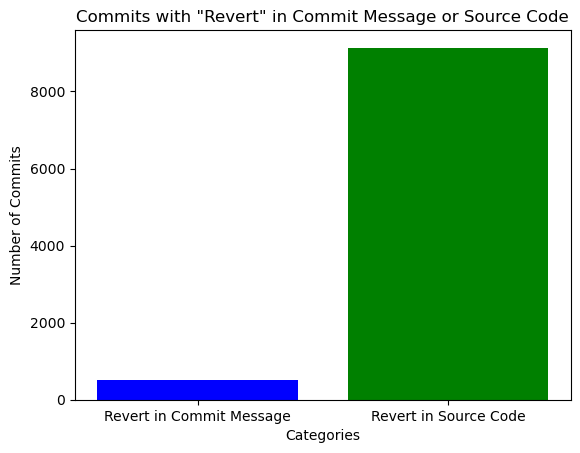

In [35]:
import matplotlib.pyplot as plt
def count_commits_with_revert(repo_path):
    revert_count_msg = 0
    revert_count_source_code = 0

    # Get the Repository object
    repo = Repository(repo_path)

    # Check if the traverse_commits() method returned None
    if repo is not None:
        # Iterate over all commits in the repository
        for commit in repo.traverse_commits():
            # Check if "Revert" is present in the commit message
            if commit.msg is not None and 'Revert' in commit.msg:
                revert_count_msg += 1

            for modified_file in commit.modified_files:
                # Check if "Revert" is present in the source code
                if modified_file.source_code is not None and 'Revert' in modified_file.source_code:
                    revert_count_source_code += 1

    return revert_count_msg, revert_count_source_code

def visualize_commit_counts(repo_path):
    revert_count_msg, revert_count_source_code = count_commits_with_revert(repo_path)

    # Data for visualization
    categories = ['Revert in Commit Message', 'Revert in Source Code']
    counts = [revert_count_msg, revert_count_source_code]

    # Create a bar chart
    plt.bar(categories, counts, color=['blue', 'green'])
    plt.xlabel('Categories')
    plt.ylabel('Number of Commits')
    plt.title('Commits with "Revert" in Commit Message or Source Code')

    # Display the graph
    plt.show()
visualize_commit_counts(repository_path)

In [ ]:
# Assuming you have a dataset, load it into a DataFrame
# Replace 'your_dataset.csv' with the actual file path or URL
dataset = pd.read_csv('G:\University_Of_Windsor_Assignments\Topics In Software Engineering\Project\Output\Output_Commit_Revert_Diff_Data.csv')

# Assuming your target variable is named 'target' and other features are the predictors
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
